In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
t = pd.read_csv('~/Downloads/train.csv')

In [112]:
te = pd.read_csv('~/Downloads/test.csv')

In [113]:
t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [115]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [116]:
t.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [117]:
# to check the hidden NULL values( we find the value of the sum of the null values in the column)
t.isnull().sum()[t.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [118]:
t.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [119]:
t.Electrical=t.Electrical.fillna(value="Sbrkr")

In [120]:
# to check the hidden NULL values( we find the value of the sum of the null values in the column)
te.isnull().sum()[te.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [121]:
te.BsmtHalfBath.describe()

count    1457.000000
mean        0.065202
std         0.252468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [122]:
te.BsmtHalfBath=te.BsmtHalfBath.fillna(value=0)

In [123]:
te.BsmtFullBath.describe()

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [124]:
te.BsmtFullBath=te.BsmtFullBath.fillna(value=0)

In [125]:
te.TotalBsmtSF.describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [126]:
te.TotalBsmtSF=te.TotalBsmtSF.fillna(value=988)

In [127]:
te.BsmtFinSF2.describe()

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [128]:
te.BsmtFinSF2=te.BsmtFinSF2.fillna(value=0)

In [129]:
te.BsmtUnfSF.describe()

count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64

In [130]:
te.BsmtUnfSF=te.BsmtUnfSF.fillna(value=460)

In [131]:
t.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [132]:
te.BsmtQual.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [133]:
t.BsmtQual=t.BsmtQual.fillna(value="TA")
te.BsmtQual=te.BsmtQual.fillna(value="TA")

In [134]:
t.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [135]:
t.BsmtCond=t.BsmtCond.fillna(value="TA")
te.BsmtCond=te.BsmtCond.fillna(value="TA")

In [136]:
t.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [137]:
t.BsmtExposure=t.BsmtExposure.fillna(value="No")
te.BsmtExposure=te.BsmtExposure.fillna(value="No")

In [138]:
t.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [139]:
t.BsmtFinType1=t.BsmtFinType1.fillna(value="Unf")
te.BsmtFinType1=te.BsmtFinType1.fillna(value="Unf")

In [140]:
t.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [141]:
t.BsmtFinType2=t.BsmtFinType2.fillna(value="Unf")
te.BsmtFinType2=te.BsmtFinType2.fillna(value="Unf")

In [142]:
te.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [143]:
te.BsmtFinSF1.describe()

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

In [144]:
te.BsmtFinSF1=te.BsmtFinSF1.fillna(value=350.5)

In [145]:
t.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [146]:
t.MSZoning=t.MSZoning.fillna(value="RL")
te.MSZoning=te.MSZoning.fillna(value="RL")

In [147]:
te.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [148]:
te.Utilities=te.Utilities.fillna(value="AllPub")

In [149]:
te.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [150]:
te.Exterior1st=te.Exterior1st.fillna(value="VinylSd")

In [151]:
te.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [152]:
te.Exterior2nd=te.Exterior2nd.fillna(value="VinylSd")

In [153]:
te.MasVnrType.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [154]:
t.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [155]:
t.MasVnrType=t.MasVnrType.fillna(value="None")
te.MasVnrType=te.MasVnrType.fillna(value="None")

In [156]:
te.MasVnrArea.describe()

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64

In [157]:
t.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [158]:
t.MasVnrArea=t.MasVnrArea.fillna(value=0)
te.MasVnrArea=te.MasVnrArea.fillna(value=0)

In [159]:
te.KitchenQual.value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [160]:
te.KitchenQual=te.KitchenQual.fillna(value="TA")

In [161]:
te.Functional.value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [162]:
te.Functional=te.Functional.fillna(value="Typ")

In [163]:
te.GarageYrBlt.describe()

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [164]:
te.GarageYrBlt=te.GarageYrBlt.fillna(value=1979)

In [165]:
te.GarageCars.describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [166]:
te.GarageCars=te.GarageCars.fillna(value=2)

In [167]:
te.GarageArea.describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [168]:
te.GarageArea=te.GarageArea.fillna(value=480)

In [169]:
te.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [170]:
te.SaleType=te.SaleType.fillna(value="WD")

In [171]:
t.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [172]:
t.LotFrontage=t.LotFrontage.fillna(value=69)

In [173]:
te.LotFrontage=te.LotFrontage.fillna(value=69)

In [174]:
t.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [175]:
t.Alley=t.Alley.fillna(value="Grvl")
te.Alley=te.Alley.fillna(value="Grvl")

In [176]:
t.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [177]:
t.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [178]:
t.FireplaceQu=t.FireplaceQu.fillna(value="Gd")
te.FireplaceQu=te.FireplaceQu.fillna(value="Gd")

In [179]:
t.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [180]:
t.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [181]:
t.GarageType=t.GarageType.fillna(value="Attchd")
te.GarageType=te.GarageType.fillna(value="Attchd")

In [182]:
t.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [183]:
t.GarageYrBlt=t.GarageYrBlt.fillna(value=1980)
te.GarageType=te.GarageType.fillna(value="Attchd")

In [184]:
t.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [185]:
t.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [186]:
t.GarageFinish=t.GarageFinish.fillna(value="Unf")
te.GarageFinish=te.GarageFinish.fillna(value="Unf")

In [187]:
t.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [188]:
t.GarageQual=t.GarageQual.fillna(value="TA")
te.GarageQual=te.GarageQual.fillna(value="TA")

In [189]:
t.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [190]:
t.GarageCond=t.GarageCond.fillna(value="TA")
te.GarageCond=te.GarageCond.fillna(value="TA")

In [191]:
t.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [192]:
t.PoolQC=t.PoolQC.fillna(value="Gd")
te.PoolQC=te.PoolQC.fillna(value="Gd")

In [193]:
t.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [194]:
t.Fence=t.Fence.fillna(value="MnPrv")
te.Fence=te.Fence.fillna(value="MnPrv")

In [195]:
t.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [196]:
t.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [197]:
t.MiscFeature=t.MiscFeature.fillna(value="Shed")
te.MiscFeature=te.MiscFeature.fillna(value="Shed")

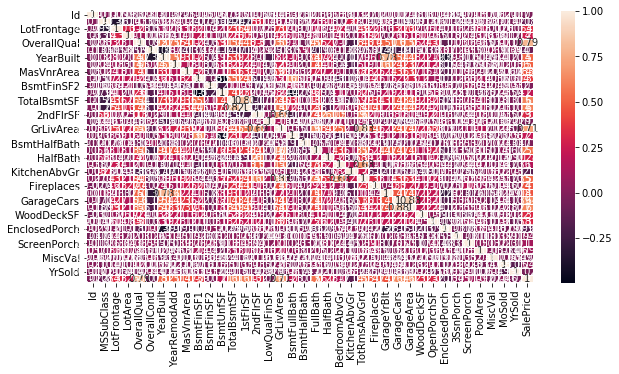

In [198]:
plt.figure(figsize=(10,5))
sns.heatmap(t.corr(), linewidths=.01, annot=True)

In [199]:
t.columns
cols=['SalePrice','MSSubClass','LotArea','OverallQual','OverallCond','TotalBsmtSF']

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


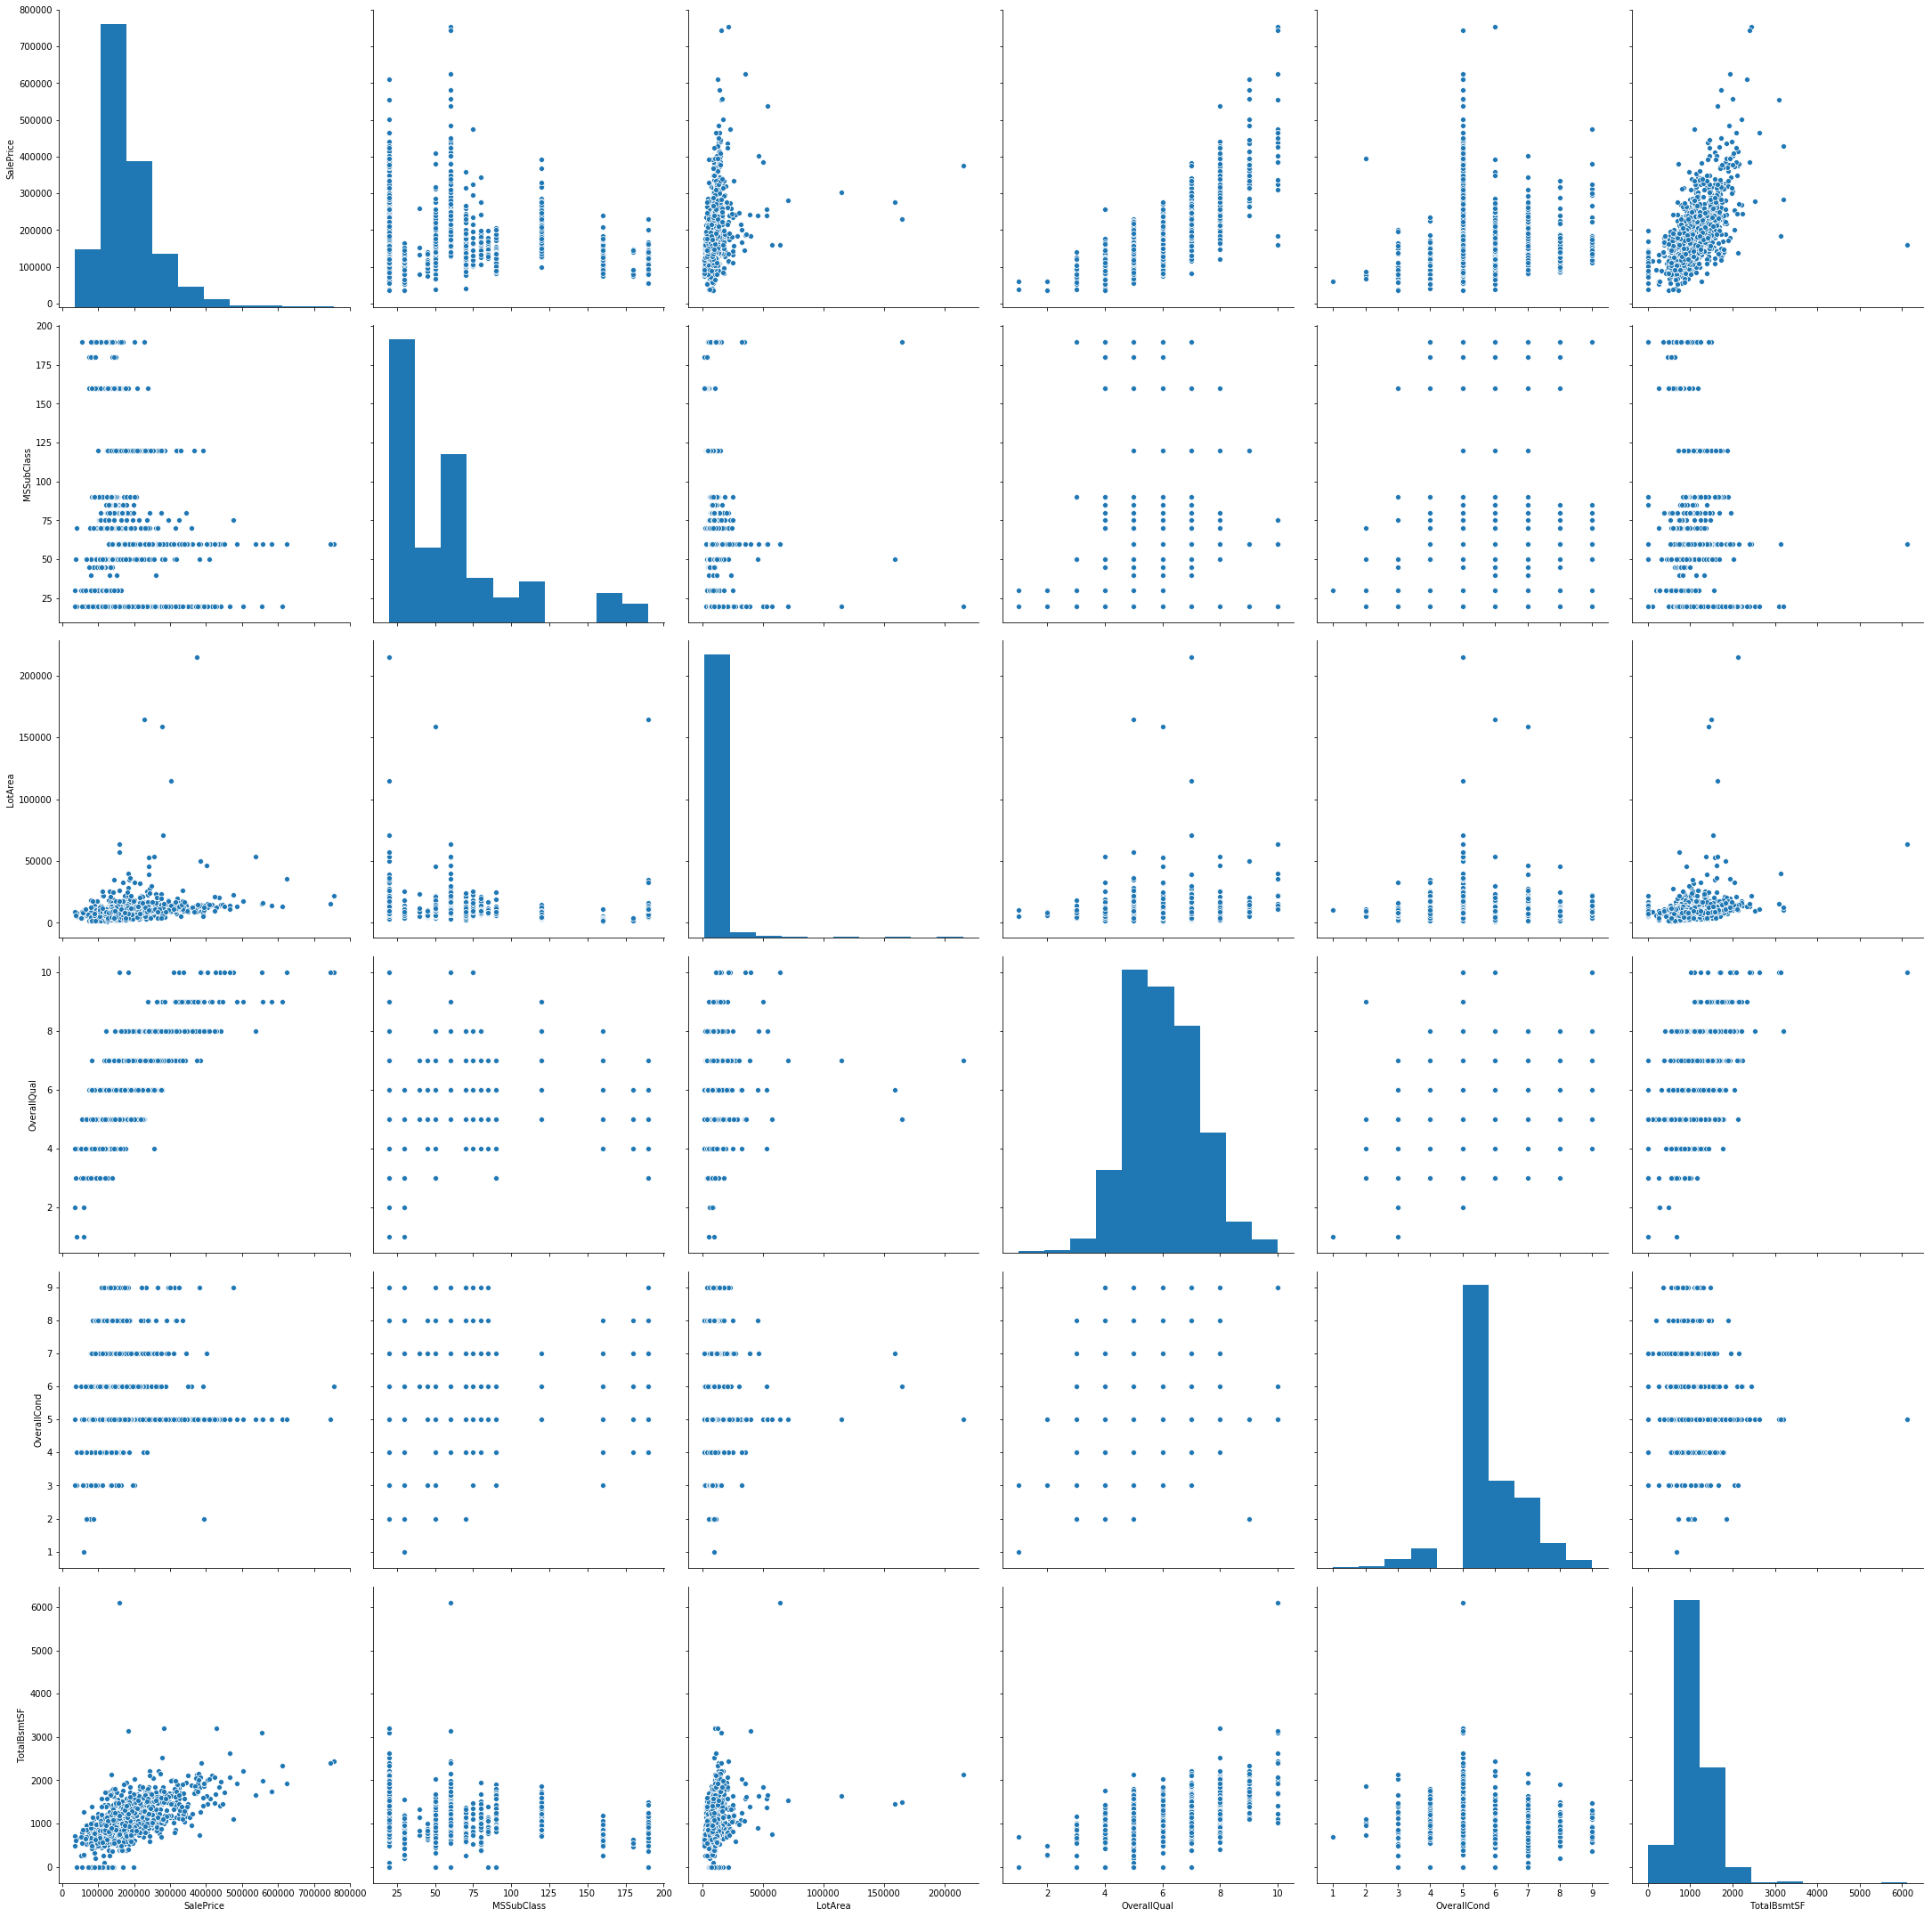

In [200]:
sns.pairplot(t[cols], size = 5)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


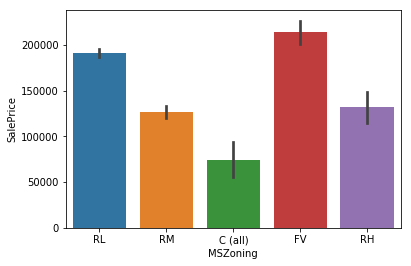

In [201]:
sns.barplot(x="MSZoning", y = "SalePrice", data=t)

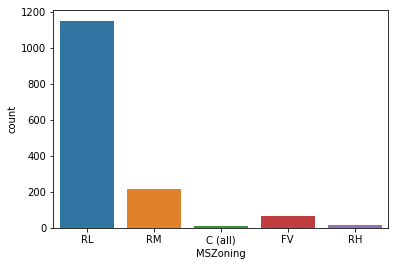

In [202]:
sns.countplot(x="MSZoning", data = t)

In [203]:
t.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

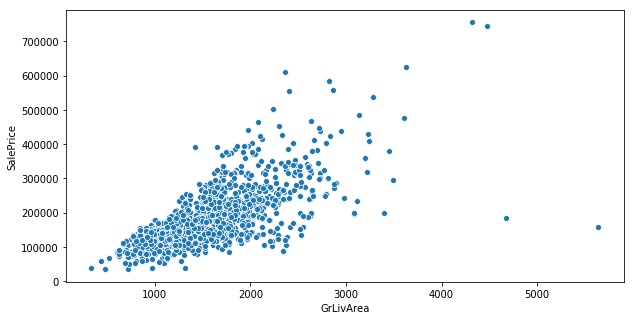

In [204]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data =t)

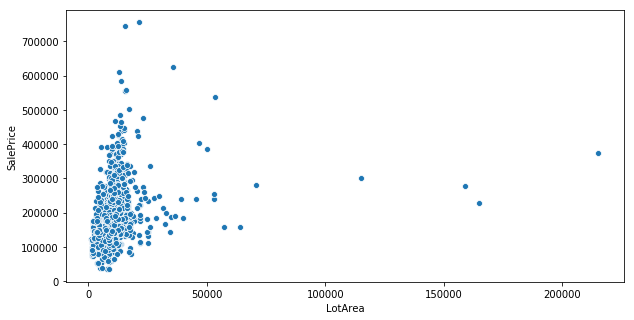

In [205]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="LotArea", y="SalePrice", data =t)

In [206]:
t.drop(['Id','YearRemodAdd','YearBuilt','MoSold','YrSold','GarageYrBlt'],axis=1)
te.drop(['Id','YearRemodAdd','YearBuilt','MoSold','YrSold','GarageYrBlt'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,120,0,Gd,MnPrv,Shed,0,WD,Normal
1,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Gd,MnPrv,Gar2,12500,WD,Normal
2,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal
3,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal
4,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,...,0,0,144,0,Gd,MnPrv,Shed,0,WD,Normal
5,60,RL,75.0,10000,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal
6,20,RL,69.0,7980,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,Gd,GdPrv,Shed,500,WD,Normal
7,60,RL,63.0,8402,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal
8,20,RL,85.0,10176,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal
9,20,RL,70.0,8400,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,0,0,Gd,MnPrv,Shed,0,WD,Normal


In [207]:
newtrain=pd.get_dummies(t)
newtrain.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [208]:
newtest=pd.get_dummies(te)
newtest.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [209]:
newtrain.shape

(1460, 291)

In [210]:
newtest.shape

(1459, 271)

In [211]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [212]:
scaled_train=pd.DataFrame(sc.fit_transform(newtrain), columns=newtrain.columns)
scaled_test=pd.DataFrame(sc.fit_transform(newtest), columns=newtest.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [213]:
scaled_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [214]:
scaled_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.552396,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.728490,-0.874711,0.601046,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,-1.726115,0.061351,0.260492,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,-1.723741,0.061351,0.455095,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-1.721367,1.465443,-1.247675,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,...,-0.045392,-0.295268,-0.052432,0.398568,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [215]:
scaled_train.shape

(1460, 291)

In [227]:
scaled_test.shape

(1459, 271)

In [229]:
y=scaled_train.SalePrice

In [217]:
from sklearn.decomposition import PCA
pc = PCA(n_components = 169)

In [218]:
pc_train=pc.fit_transform(scaled_train)
pc_test=pc.fit_transform(scaled_test)

In [219]:
pc_train.shape

(1460, 169)

In [220]:
pc_test.shape

(1459, 169)

In [221]:
pc.fit_transform(scaled_train)

array([[ 4.23049987, -1.72997859, -2.07150714, ..., -0.07415176,
         0.07824647, -0.17522357],
       [ 0.03558128,  3.3176235 , -0.73363715, ...,  0.62632316,
        -1.42305969, -0.43617242],
       [ 5.03386768, -0.74584127, -1.34106868, ..., -0.17142905,
        -0.10140527, -0.13222383],
       ...,
       [ 0.94515664, -1.18773588,  2.92865521, ...,  0.35061441,
         1.65013042, -0.97678069],
       [-3.25780038,  3.22508467, -1.06502601, ..., -0.51295446,
         0.82254182, -0.01060716],
       [-1.39815376,  3.71702872, -1.51200414, ...,  0.97077182,
         0.26997024, -0.17117409]])

In [224]:
np.cumsum(pc.explained_variance_ratio_)

array([0.06450164, 0.09338284, 0.11711289, 0.13651348, 0.15303366,
       0.16887675, 0.18316245, 0.19596558, 0.20858961, 0.22057189,
       0.23202689, 0.24301299, 0.25364955, 0.26406023, 0.27401949,
       0.28371682, 0.29337218, 0.30267209, 0.31192713, 0.32074107,
       0.32938288, 0.337821  , 0.34620746, 0.35442725, 0.36248579,
       0.37043155, 0.3782851 , 0.38597545, 0.39349185, 0.40096835,
       0.40832688, 0.4155932 , 0.42276966, 0.42980382, 0.43676287,
       0.44366531, 0.45054306, 0.45729716, 0.46391069, 0.47034894,
       0.47670547, 0.48300927, 0.48924478, 0.49532525, 0.50128962,
       0.50724437, 0.51312211, 0.51897163, 0.52467427, 0.53033779,
       0.53596519, 0.54152173, 0.54699385, 0.55241443, 0.5577546 ,
       0.56305815, 0.56827361, 0.57345926, 0.5785826 , 0.58366851,
       0.58869811, 0.59363722, 0.59852245, 0.60333843, 0.60812914,
       0.61290059, 0.61763067, 0.62230081, 0.62695592, 0.63158158,
       0.63613241, 0.64064722, 0.6450811 , 0.64949597, 0.65389

In [225]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [236]:
pred_le=le.fit(pc_train,y).predict(pc_test)

In [237]:
save= sc.fit_transform(pd.DataFrame(t.SalePrice))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [238]:
sale = sc.inverse_transform(pred_le)

In [240]:
solution = pd.DataFrame ({"ID":te.Id,"SalePrice":sale})

In [241]:
solution.to_csv("HousePrice LE Model.csv",index = False)

In [242]:
cd

/Users/siddharth
